# Eksploracja danych w internecie

## Laboartorium 07-08

### 1. Przygotowanie środowiska
Przed przystąpieniem do korzystania z narzędzia Selenium należy przygotować środowisko wirtualne*, w którym zainstalowane zostaną wszystkie niezbędne pakiety. W tym celu wykonaj poniższe instrukcje.
```shell
conda create -n sel python=3 selenium notebook requests lxml
conda activate sel
conda install -c conda-forge geckodriver
conda install -c conda-forge python-chromedriver-binary
```

_\* Oczywiście nie musi być to środowisko wirtualne a tym bardziej conda._

### 2. Przykład odczytania adresów email za pomocą pakietu requests
**Istotne**: Źródło strony zostanie pobrane, jednak kod javascript nie zostanie wykonany w związku z czym "ukryte" adresy email nie zostaną "odnalezione".

In [1]:
# Importowanie wszystkich pakietów
import requests
from lxml import etree
from selenium import webdriver

In [2]:
# Prykładowy adres URL
url = "https://www.kis.p.lodz.pl/staff.158.html"

In [3]:
# Pobranie źródła strony za pomocą pakietu requests
source_html = requests.get(url)

In [4]:
# Na poniższym przykładzie dobrze widać, że email
# który zamierzamy odczytać jest "zamaskowany" funkcją javascript,
# która generuje odpowiedni fragment kodu z adresem email
# (w tym przypadku nie wygenerowany).
# Wiemy już, że części adresów na pewno nie odnajdziemy.
idx = source_html.content.decode().index("E-mail")
source_html.content.decode()[idx:idx + 280]

'E-mail:</td>\n\t\t<td><script type="text/javascript">safemail3("&#x72;&#x73;&#x75;&#x73;&#x69;&#x6b;","&#x6b;&#x69;&#x73;&#x2e;&#x70;&#x2e;&#x6c;&#x6f;&#x64;&#x7a;&#x2e;&#x70;&#x6c;")</script></td>\n\t</tr>\n\t\t\t\t<tr>\n\t\t<td align="right">Godziny przyjęć:</td>\n\t\t<td><div style="display: '

In [5]:
# Zastosowanie zapytania XPATH w celu
# pobrania linków ze strony (tagów "a" z atrybutem "href").
parser = etree.HTMLParser(recover=True)
tree = etree.fromstring(source_html.content, parser=parser)
links_req = [
    x.attrib['href']
    for x in tree.xpath('//a[@href]')  # zapytanie XPATH
    ]

print(f'Liczba odnośników: {len(links_req)}')
print(links_req)

Liczba odnośników: 24
['main_page.html', 'mailto:katedra@kis.p.lodz.pl', 'mapa.html', '?lang=pl', '?lang=en', 'masters_courses.html', 'schedule.html', 'godziny_przyjec.html', 'prace_dyplomowe.html', 'mapa.html', 'euprojects.html', 'conferences.html', 'research.html', 'teaching.html', 'training.html', 'podyplomowe.html', 'staff.html', 'about_kis.html', 'news.html', '#staffTab1', '#staffTab2', 'https://www.researchgate.net/profile/Robert_Susik', 'http://www.p.lodz.pl', 'mapa.html']


In [ ]:
# Zastosowanie zapytania XPATH w celu
# pobrania adresów email.
# Tutaj założenie, że adresy email znajdują się
# w atrybucie "href" po słowie kluczowym "mailto:"
# w znacznikach "a".
parser = etree.HTMLParser(recover=True)
tree = etree.fromstring(source_html.content, parser=parser)
emails_req = [
    x.attrib['href'].replace("mailto:", "")
    for x in tree.xpath("//a[starts-with(@href,'mailto:')]")  # zapytanie XPATH
    ]

print(f'Liczba adresów email: {len(emails_req)}\n')
print(emails_req)

#### Widać na powyższym przykładzie, że adres email, który był celem nie został pobrany ze strony internetowej
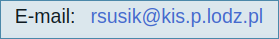

### 3. Przykład odczytania adresów email za pomocą narzędzia Selenium

In [7]:
# Otworzenie strony za pomocą sterownika
# przeglądarki - na tym przykładzie jest to Firefox.
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # okno przeglądarki nie będzie widoczne
driver = webdriver.Chrome('./chromedriver', options=options)  # może być też Chrome lub inna przeglądarka
# W niektórych instalacjach sterownika konieczne
# jest podanie pełnej ścieżki do sterownika (jeżeli
# nie dodały się zmienne środowiskowe).
# driver = webdriver.Firefox("/sciezka/do/sterownika/geckodriver", options=options)

driver.get("https://www.kis.p.lodz.pl/staff.158.html")

/var/folders/kr/lqr2hbld7695341s_wlpndbw0000gn/T/ipykernel_95319/1403144200.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver', options=options)  # może być też Chrome lub inna przeglądarka


In [8]:
# Pobranie wszystkich "linków" ze strony
links_sel = [
    x
        .get_attribute("href")
        .replace("mailto:", "")
    for x in
    driver.find_elements_by_xpath("//a[@href]")
    ]

print(f'Liczba odnośników: {len(links_sel)}\n')
print(links_sel)

/var/folders/kr/lqr2hbld7695341s_wlpndbw0000gn/T/ipykernel_95319/4287362298.py:7: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_xpath("//a[@href]")


Liczba odnośników: 28

['https://www.kis.p.lodz.pl/main_page.html', 'katedra@kis.p.lodz.pl', 'https://www.kis.p.lodz.pl/mapa.html', 'https://www.kis.p.lodz.pl/staff.158.html?lang=pl', 'https://www.kis.p.lodz.pl/staff.158.html?lang=en', 'https://www.kis.p.lodz.pl/masters_courses.html', 'https://www.kis.p.lodz.pl/schedule.html', 'https://www.kis.p.lodz.pl/godziny_przyjec.html', 'https://www.kis.p.lodz.pl/prace_dyplomowe.html', 'https://www.kis.p.lodz.pl/mapa.html', 'https://www.kis.p.lodz.pl/euprojects.html', 'https://www.kis.p.lodz.pl/conferences.html', 'https://www.kis.p.lodz.pl/research.html', 'https://www.kis.p.lodz.pl/teaching.html', 'https://www.kis.p.lodz.pl/training.html', 'https://www.kis.p.lodz.pl/podyplomowe.html', 'https://www.kis.p.lodz.pl/staff.html', 'https://www.kis.p.lodz.pl/about_kis.html', 'https://www.kis.p.lodz.pl/news.html', 'rsusik@kis.p.lodz.pl', 'https://www.kis.p.lodz.pl/staff.158.html#staffTab1', 'https://www.kis.p.lodz.pl/staff.158.html#staffTab2', 'rsusik@kis

#### Już (powyżej) widać, że jest więcej adresów niż było poprzednio

In [9]:
emails_sel = [
    x
        .get_attribute("href")
        .replace("mailto:", "")
    for x in
    driver.find_elements_by_xpath("//a[contains(@href,'mailto:')]")
    ]
print(f'Liczba adresów email: {len(emails_sel)}\n')
print(emails_sel)
print(f'\nAdresy które nie zostały wcześniej odnalezione:\n{set(emails_sel).difference(set(emails_req))}')

/var/folders/kr/lqr2hbld7695341s_wlpndbw0000gn/T/ipykernel_95319/4183723251.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_xpath("//a[contains(@href,'mailto:')]")


Liczba adresów email: 5

['katedra@kis.p.lodz.pl', 'rsusik@kis.p.lodz.pl', 'rsusik@kis.p.lodz.pl', 'instytut@iis.p.lodz.pl', 'webmaster@iis.p.lodz.pl']

Adresy które nie zostały wcześniej odnalezione:
{'rsusik@kis.p.lodz.pl', 'webmaster@iis.p.lodz.pl', 'instytut@iis.p.lodz.pl'}


#### Na powyższym przykładzie widać adresy które nie zostały wcześniej odnalezione.

In [10]:
# Dla dopełnienia fragment kodu źródłowego otrzymanego z przeglądarki,
# gdzie widać wygenerowany fragment kodu z adresem email.
idx = driver.page_source.index("E-mail")
driver.page_source[idx:idx + 280]

'E-mail:</td>\n\t\t<td><script type="text/javascript">safemail3("&#x72;&#x73;&#x75;&#x73;&#x69;&#x6b;","&#x6b;&#x69;&#x73;&#x2e;&#x70;&#x2e;&#x6c;&#x6f;&#x64;&#x7a;&#x2e;&#x70;&#x6c;")</script><a href="mailto:rsusik@kis.p.lodz.pl">rsusik@kis.p.lodz.pl</a></td>\n\t</tr>\n\t\t\t\t<tr>\n\t\t<td a'

In [11]:
# Zamknięcie sterownika
driver.quit()